그래프 한글표시

In [1]:
!sudo apt-get install -yfonts-nanum
!sudo fc-cache - fv
!rm ~/.cache/matplotlib -rf

E: Option -yfonts-nanum: Configuration item specification must have an =<val>.


In [2]:
import numpy as no
import pandas as pd
import matplotlib.pyplot as plt

데이터 불러오기

In [3]:
df_k = pd.read_csv('/content/키_몸무게_2019 - 키_몸무게_2019.csv')
df_k

,col,0,1,2,3,4,5,6,7,8,...,3241,3242,3243,3244,3245,3246,3247,3248,3249,3250
0,신장(5Cm단위),155,145,175.0,175,165,155,165,165,185,...,160,165,155.0,180,170,170,155,160,160,160
1,체중(5Kg 단위),45,60,60.0,90,55,40,75,70,80,...,55,55,45.0,75,55,80,55,50,70,60
2,허리둘레,64,81,72.6,93,65,60,86,87,85,...,69,75,63.5,82,73,92,66,76,83,77


데이터 행& 열 바꾸기

In [4]:
df_k = df_k.set_index('col')
df_k

,0,1,2,3,4,5,6,7,8,9,...,3241,3242,3243,3244,3245,3246,3247,3248,3249,3250
col,,,,,,,,,,,,,,,,,,,,,
신장(5Cm단위),155,145,175.0,175,165,155,165,165,185,165,...,160,165,155.0,180,170,170,155,160,160,160
체중(5Kg 단위),45,60,60.0,90,55,40,75,70,80,80,...,55,55,45.0,75,55,80,55,50,70,60
허리둘레,64,81,72.6,93,65,60,86,87,85,92,...,69,75,63.5,82,73,92,66,76,83,77


In [5]:
df_k = df_k.T
df_k

col,신장(5Cm단위),체중(5Kg 단위),허리둘레
0,155.0,45.0,64.0
1,145.0,60.0,81.0
2,175.0,60.0,72.6
3,175.0,90.0,93.0
4,165.0,55.0,65.0
...,...,...,...
3246,170.0,80.0,92.0
3247,155.0,55.0,66.0
3248,160.0,50.0,76.0
3249,160.0,70.0,83.0


데이터 확인하기

In [6]:
df_k.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3251 entries, 0 to 3250
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   신장(5Cm단위)   3251 non-null   float64
 1   체중(5Kg 단위)  3251 non-null   float64
 2   허리둘레        3251 non-null   float64
dtypes: float64(3)
memory usage: 230.6+ KB


In [7]:
df_k.describe()

col,신장(5Cm단위),체중(5Kg 단위),허리둘레
count,3251.000000,3251.000000,3251.000000
mean,164.369425,61.851738,75.545432
std,8.389688,13.725916,10.247367
min,145.000000,35.000000,52.000000
25%,160.000000,50.000000,68.000000
50%,165.000000,60.000000,74.000000
75%,170.000000,70.000000,82.000000
max,190.000000,125.000000,124.000000


컬럼명 바꾸기

In [8]:
df_k.columns = ["신장", "체중", "허리둘레"]
df_k

,신장,체중,허리둘레
0,155.0,45.0,64.0
1,145.0,60.0,81.0
2,175.0,60.0,72.6
3,175.0,90.0,93.0
4,165.0,55.0,65.0
...,...,...,...
3246,170.0,80.0,92.0
3247,155.0,55.0,66.0
3248,160.0,50.0,76.0
3249,160.0,70.0,83.0


키 160인 사람들의 DATAFRAME 만들기

In [18]:
df_k[ df_k['신장'] == 160]
df_160 = df_k[ df_k['신장'] == 160 ]
df_160

,신장,체중,허리둘레
11,160.0,70.0,84.3
24,160.0,75.0,81.5
32,160.0,60.0,76.0
33,160.0,50.0,66.0
43,160.0,45.0,63.0
...,...,...,...
3239,160.0,50.0,72.0
3241,160.0,55.0,69.0
3248,160.0,50.0,76.0
3249,160.0,70.0,83.0


특정한 키 = 160 평균구하기

In [10]:
df_160['체중'].sum()

42570.0

In [11]:
len(df_160)

751

In [12]:
df_160['체중'].sum() / len(df_160)

56.684420772303596

신장별 평균 몸무게 구하기

In [13]:
df_k.groupby('신장')['체중'].mean()

신장
145.0    46.500000
150.0    48.951613
155.0    52.173077
160.0    56.684421
165.0    61.851266
170.0    68.163462
175.0    73.280872
180.0    78.810976
185.0    80.113636
190.0    95.000000
Name: 체중, dtype: float64

그래프 집계

In [14]:
df_k.groupby('신장')['체중'].count()

신장
145.0     20
150.0    186
155.0    520
160.0    751
165.0    632
170.0    520
175.0    413
180.0    164
185.0     44
190.0      1
Name: 체중, dtype: int64

신장/체중/허리둘레 그래프 그리기

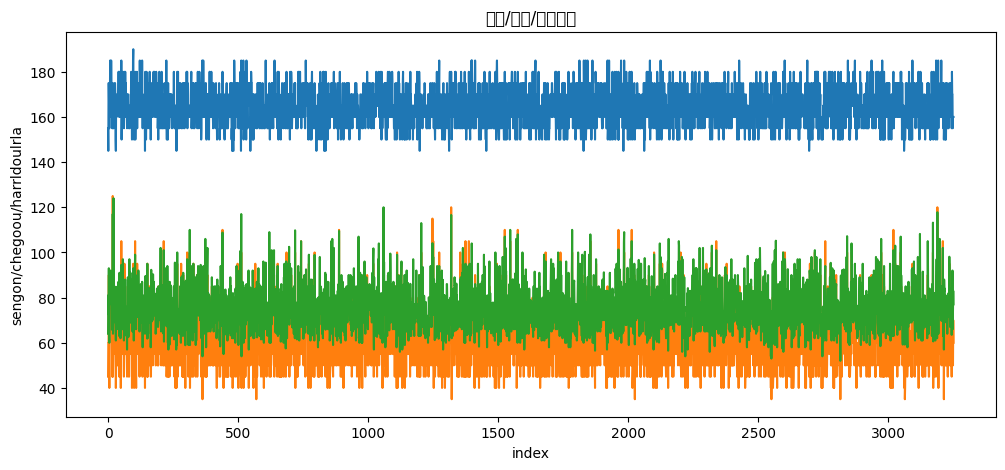

In [17]:
df_k.index = df_k.index.astype(int)
plt.figure(figsize=(12,5))
plt.xlabel('index')
plt.ylabel('sengon/chegoou/harrldoulrla')
plt.title("신장/체중/허리둘레")
plt.plot(df_k)
plt.show()

통계적 데이터의 분포와 이상치 시각화

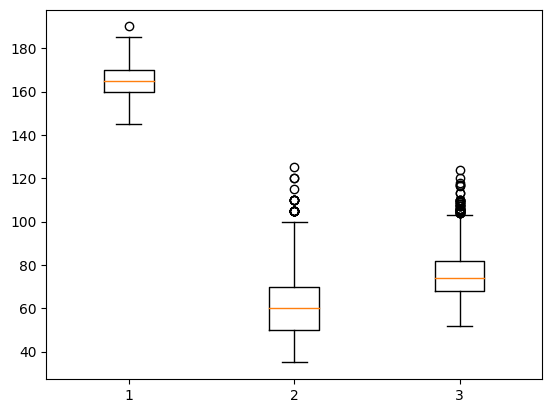

In [19]:
plt.boxplot(df_k)
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54728 (\N{HANGUL SYLLABLE HEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

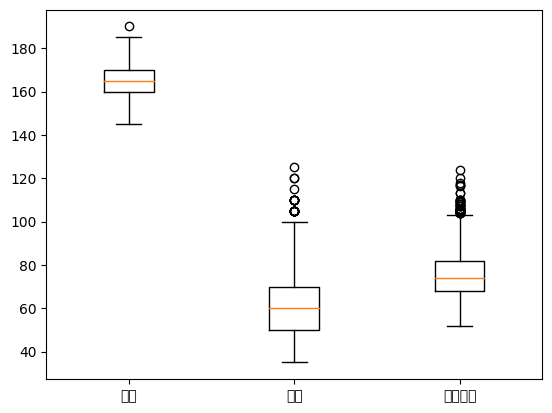

In [20]:
plt.boxplot(df_k, labels = df_k.columns)
plt.show()

강력한 Apply 함수

In [25]:
import seaborn as sns
def 체중구분(체중):
  if 체중<55:
    return '마름'
  elif 체중<70:
    return '보통'
  else:
    return '통통'

df_k['구분'] = df_k['체중'].apply(체중구분)
df_k

,신장,체중,허리둘레,구분
0,155.0,45.0,64.0,마름
1,145.0,60.0,81.0,보통
2,175.0,60.0,72.6,보통
3,175.0,90.0,93.0,통통
4,165.0,55.0,65.0,보통
...,...,...,...,...
3246,170.0,80.0,92.0,통통
3247,155.0,55.0,66.0,보통
3248,160.0,50.0,76.0,마름
3249,160.0,70.0,83.0,통통


산점도

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


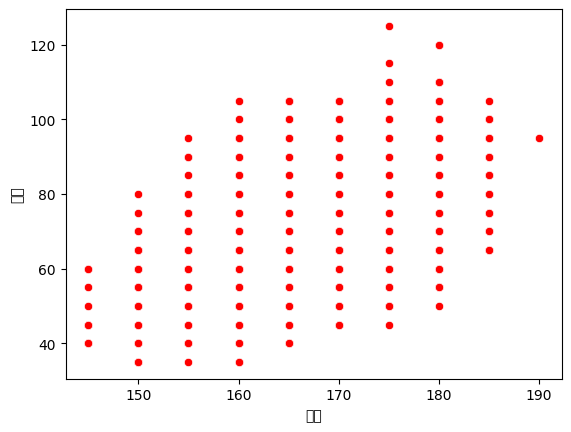

In [26]:
sns.scatterplot(data = df_k, x = '신장', y = '체중', color = 'red')
plt.show()

히스토그램

In [29]:
df_m.columns = ['세트','칼로리']
df_m.info
df_m = pd.read_csv('/content/맥도날드 세트메뉴 칼로리.csv')
df_m.describe()
df_m

,세트,칼로리(kcal)
0,빅맥 세트,916
1,1955 버거 세트,898
2,더블 1955버거 세트,1114
3,쿼터파운더 치즈 세트,885
4,더블 쿼터파운더 치즈 세트,1101
5,베이컨 토마토 디럭스 세트,910
6,맥스파이시 상하이 버거 세트,833
7,불고기 버거 세트,751
8,더블불고기 버거 세트,951
9,치즈버거세트,678


칼로리가 가장 높은 세트 3개↓

In [31]:
df_m.nlargest(3, '칼로리(kcal)')

,세트,칼로리(kcal)
2,더블 1955버거 세트,1114
4,더블 쿼터파운더 치즈 세트,1101
14,"맥치킨, 모짜렐라 세트",1038


칼로리가 가장 낮은 세트 3개↓

In [32]:
df_m.nsmallest(3, '칼로리(kcal)')

,세트,칼로리(kcal)
19,에그 맥머핀 콤보,296
20,베이컨에그 맥머핀 콤보,302
18,핫케익 3조각 세트3,335


세트메뉴 칼로리로 히스토그램 그리기

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47589 (\N{HANGUL SYLLABLE MAEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

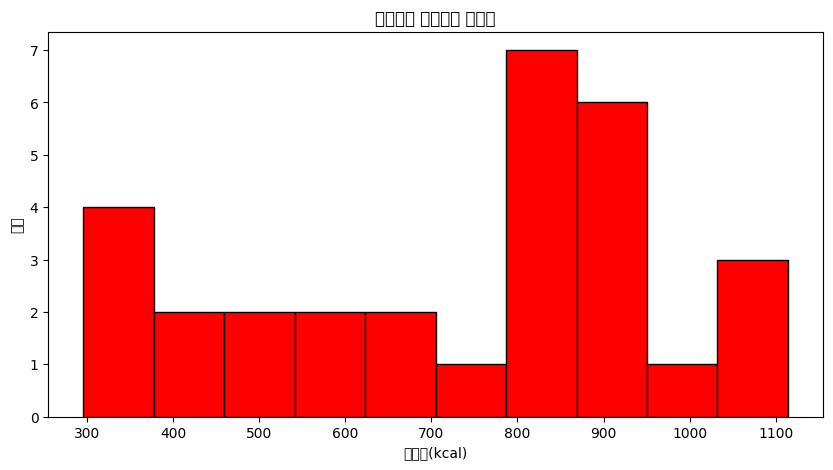

In [33]:
plt.figure(figsize = (10,5))
plt.hist(df_m['칼로리(kcal)'],bins=10, edgecolor='black', color='red')
plt.xlabel('칼로리(kcal)')
plt.ylabel('수량')
plt.title('맥도날드 세트메뉴 칼로리')
plt.show()